In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
from scipy import stats

warnings.filterwarnings("ignore")


plt.style.use('ggplot')

In [2]:
color_pal = sns.color_palette(as_cmap='virdis')
color_pal

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

In [3]:
df = pd.read_csv('./Data/Used_Cars_German_Brands')

In [4]:
df = df.sort_values(by=['year'], ascending=True).reset_index(drop=True)
# df.year = pd.to_datetime(df.year).dt.year

In [5]:
df.dtypes

year               int64
make              object
model             object
trim              object
mileage            int64
location_state    object
location_city     object
interior_color    object
exterior_color    object
num_accidents      int64
num_owners         int64
usage             object
price              int64
dtype: object

In [6]:
df.head()
TARGET = df.price

In [7]:
encoded_df = pd.get_dummies(df, columns=['interior_color','exterior_color','usage', 'make']).drop(['price'], axis=1)
encoded_df['price'] = TARGET
encoded_df.head()

,year,model,trim,mileage,location_state,location_city,num_accidents,num_owners,interior_color_Beige,interior_color_Black,...,exterior_color_Undetermined,exterior_color_Unknown,exterior_color_White,exterior_color_Yellow,usage_Fleet use,usage_Personal use,make_Audi,make_BMW,make_Mercedes-Benz,price
0,1997,Z3,Roadster 1.9L,89677,CA,Corona,0,3,0,0,...,0,0,0,0,0,1,0,1,0,8250
1,1997,Z3,Roadster 1.9L,76790,IL,McCook,0,4,0,1,...,0,0,0,0,0,1,0,1,0,7950
2,1997,SL,SL 320 Roadster,134000,ND,Dickinson,0,3,1,0,...,0,0,1,0,0,1,0,0,1,10700
3,1997,SL,SL 500 Roadster,156753,IL,Chicago,0,9,0,0,...,0,0,0,0,0,1,0,0,1,9950
4,1997,SL,SL 500 Roadster,76923,AZ,Tempe,0,8,0,0,...,0,0,1,0,0,1,0,0,1,13999


price                          1.000000
year                           0.543075
usage_Personal use             0.180195
make_Mercedes-Benz             0.171112
interior_color_Red             0.129874
exterior_color_Green           0.069411
interior_color_White           0.058311
exterior_color_Yellow          0.051475
exterior_color_Undetermined    0.046746
interior_color_Orange          0.045536
interior_color_Black           0.040729
interior_color_Brown           0.038645
exterior_color_Gray            0.037082
interior_color_Blue            0.036466
exterior_color_White           0.035228
exterior_color_Black           0.009015
interior_color_Silver         -0.000207
exterior_color_Orange         -0.000486
interior_color_Yellow         -0.001384
exterior_color_Purple         -0.002805
exterior_color_Red            -0.004215
exterior_color_Teal           -0.005721
exterior_color_Copper         -0.006737
exterior_color_Blue           -0.014737
exterior_color_Tan            -0.015383


<AxesSubplot:>

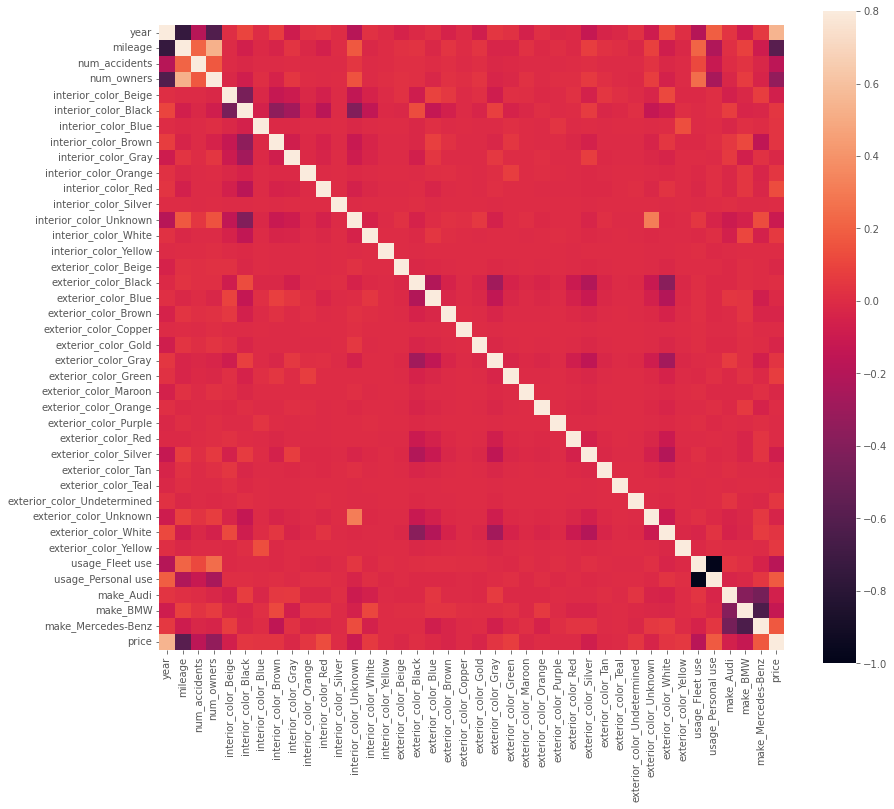

In [8]:
correlation = encoded_df.corr()
print(correlation['price'].sort_values(ascending = False))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, vmax=.8,square=True,
            linecolor="white")

Text(0.5, 1.0, 'Features Correlating with Used M5 Price')

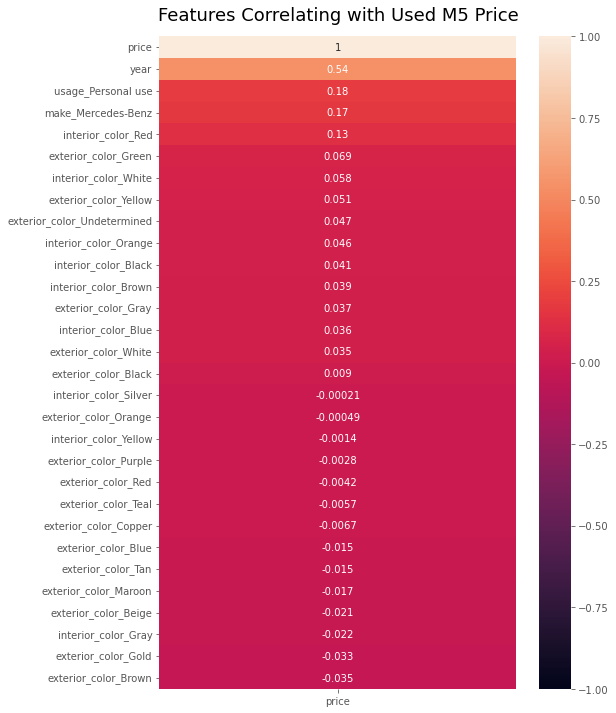

In [9]:
mat = encoded_df.corr()
data_corr = mat[['price']].sort_values(by='price', ascending=False)[:30]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Used Price', fontdict={'fontsize':18}, pad=16)

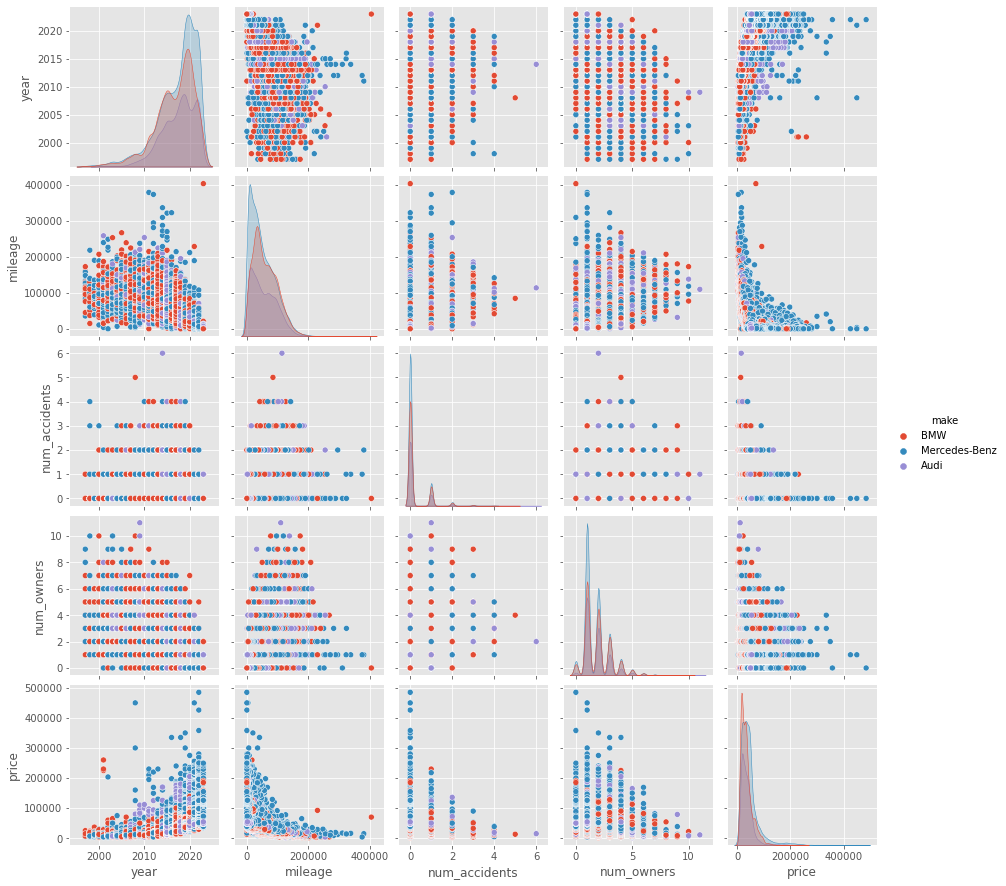

In [10]:
sns.pairplot(df, hue='make')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'num_accidents'}>,
        <AxesSubplot:title={'center':'num_owners'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

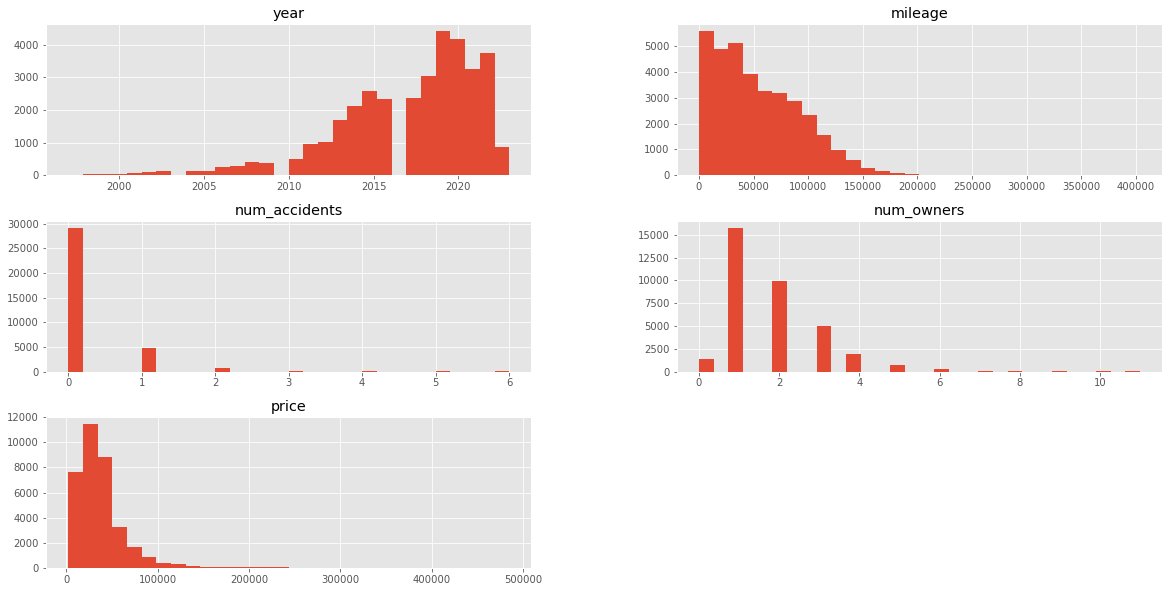

In [11]:
df.hist(bins=30, figsize=(20,10))

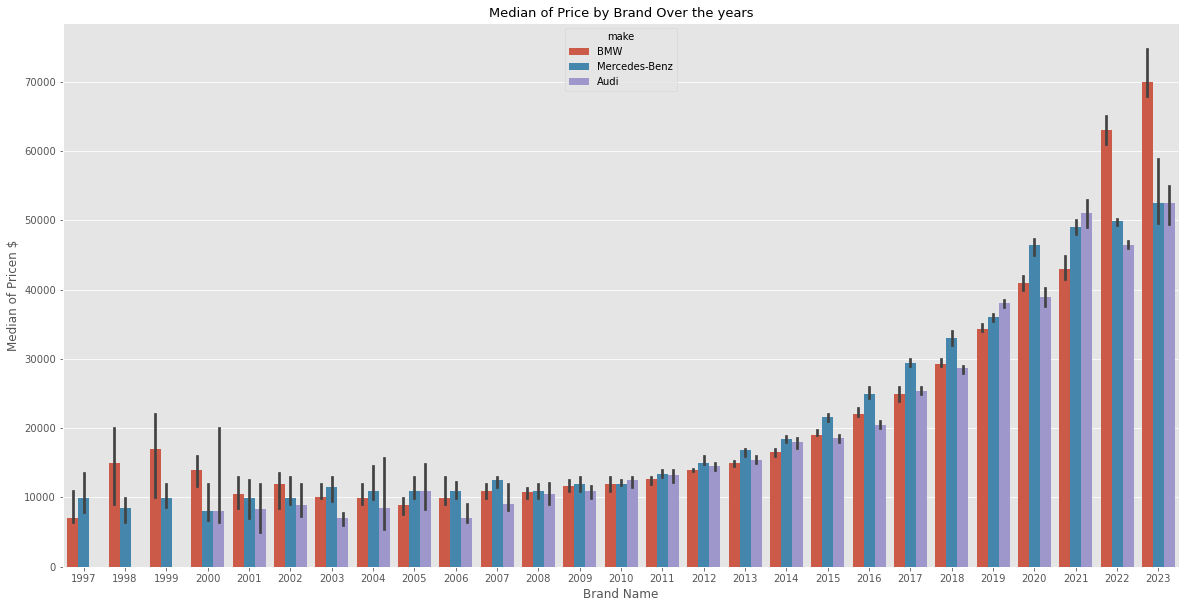

In [12]:
plt.figure(figsize = (20,10))
sns.barplot(x='year', y="price", hue='make', data = df, estimator = np.median)
plt.title('Median of Price by Brand Over the years', fontsize = 13)
plt.xlabel('Brand Name', fontsize = 12)
plt.ylabel('Median of Pricen $', fontsize = 12)
plt.show()

<AxesSubplot:xlabel='price', ylabel='mileage'>

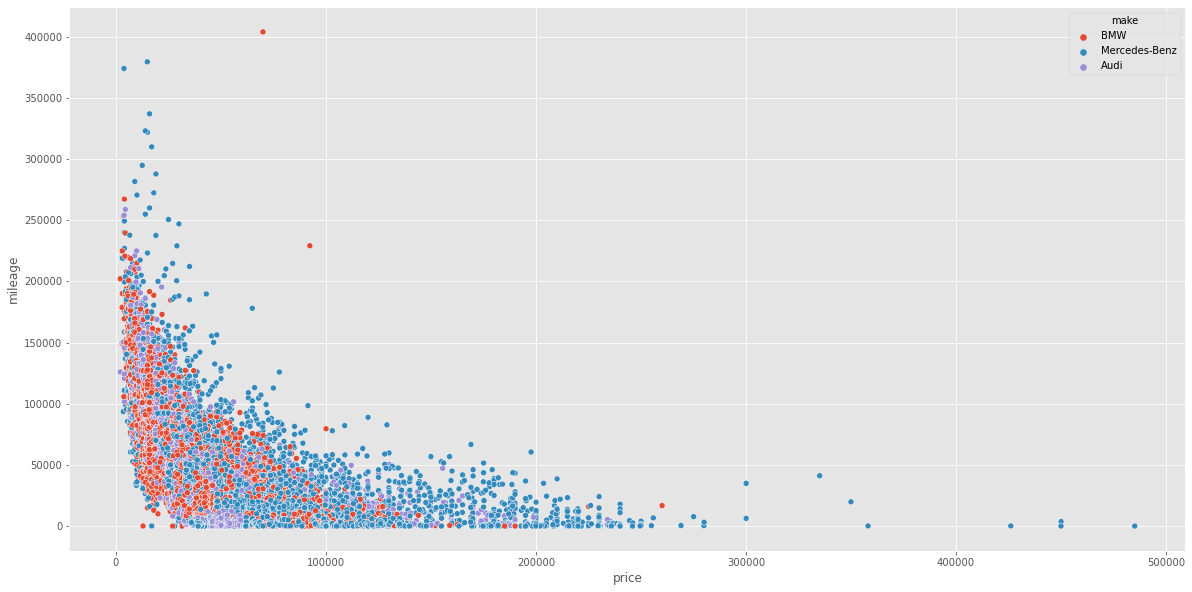

In [13]:
plt.figure(figsize=(20,10))
sns.scatterplot(df, x='price',y='mileage', hue='make')

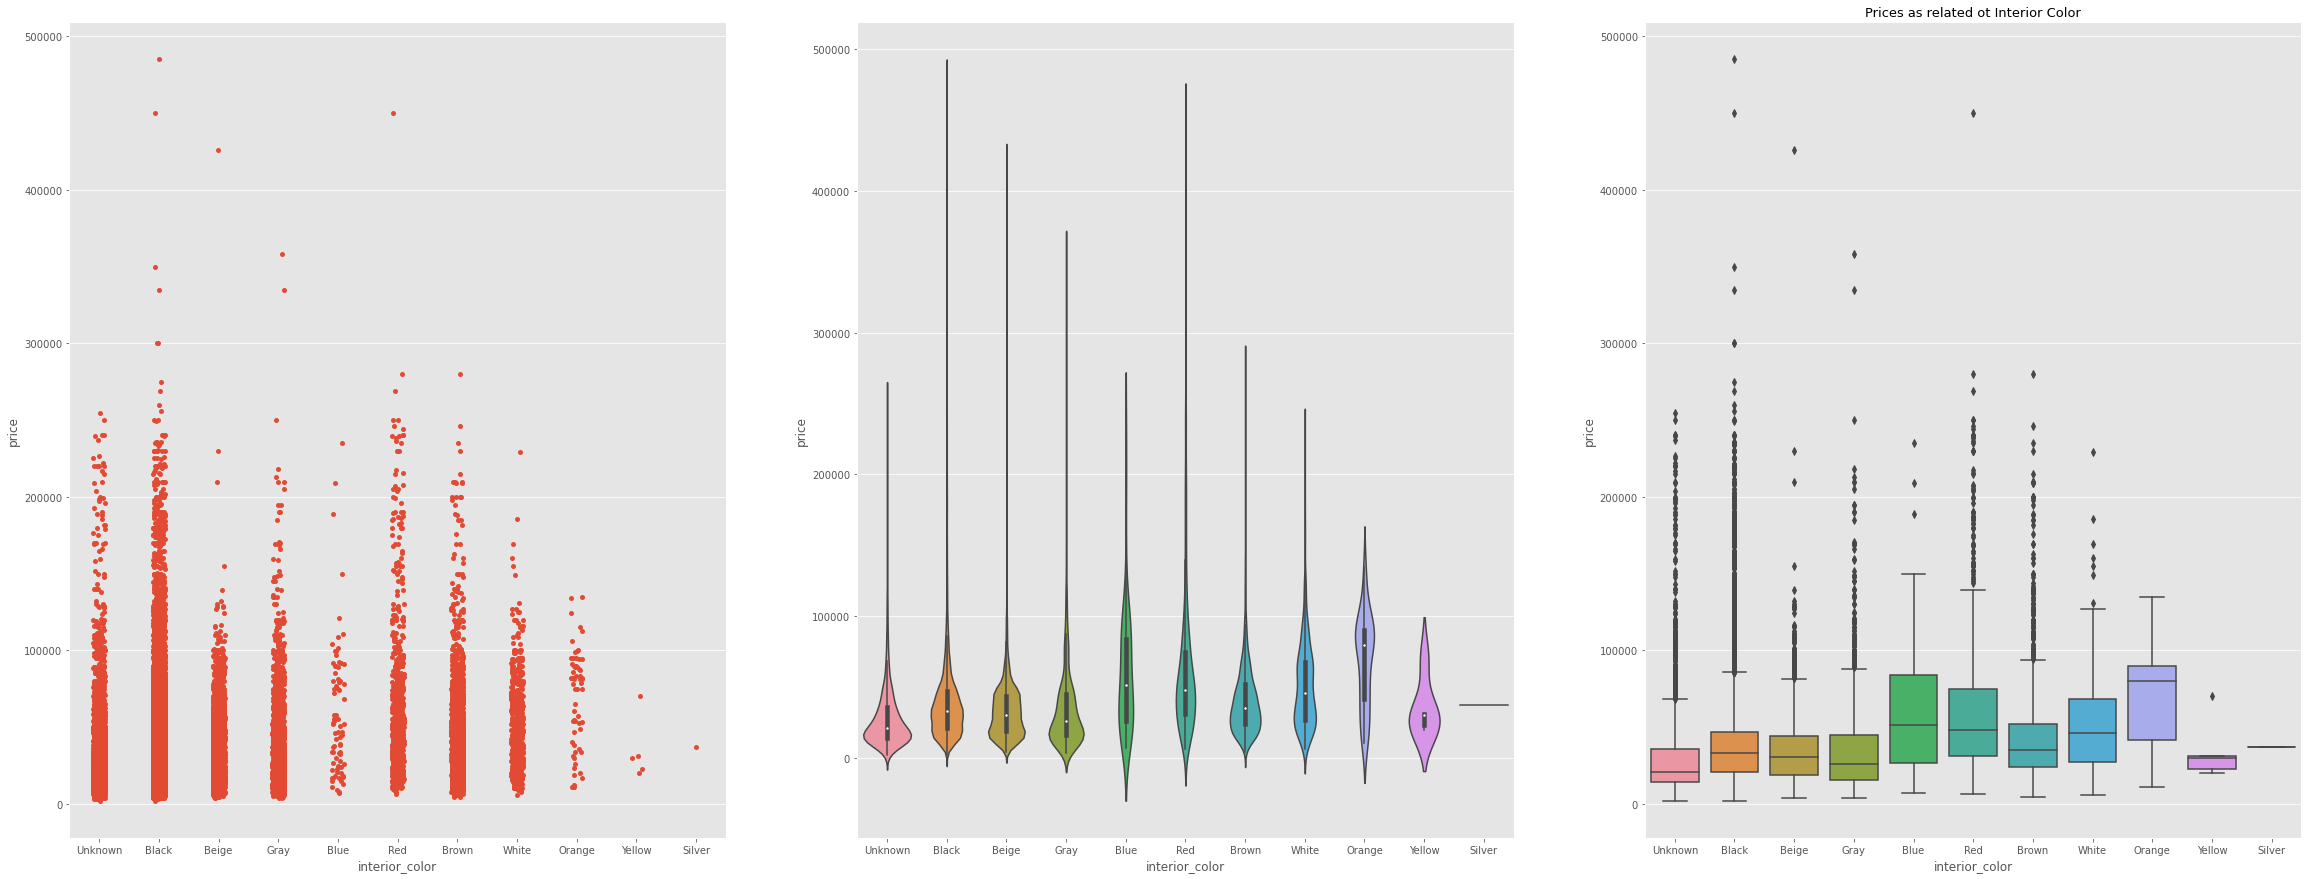

In [14]:
figure, ax = plt.subplots(1,3, figsize = (40,15))
sns.stripplot(data=df, x = 'interior_color', y='price', ax = ax[0])
sns.violinplot(data=df, x = 'interior_color', y='price', ax = ax[1])
sns.boxplot(data=df, x = 'interior_color', y='price', ax = ax[2])
plt.title('Prices as related ot Interior Color', fontsize = 13)
plt.show()

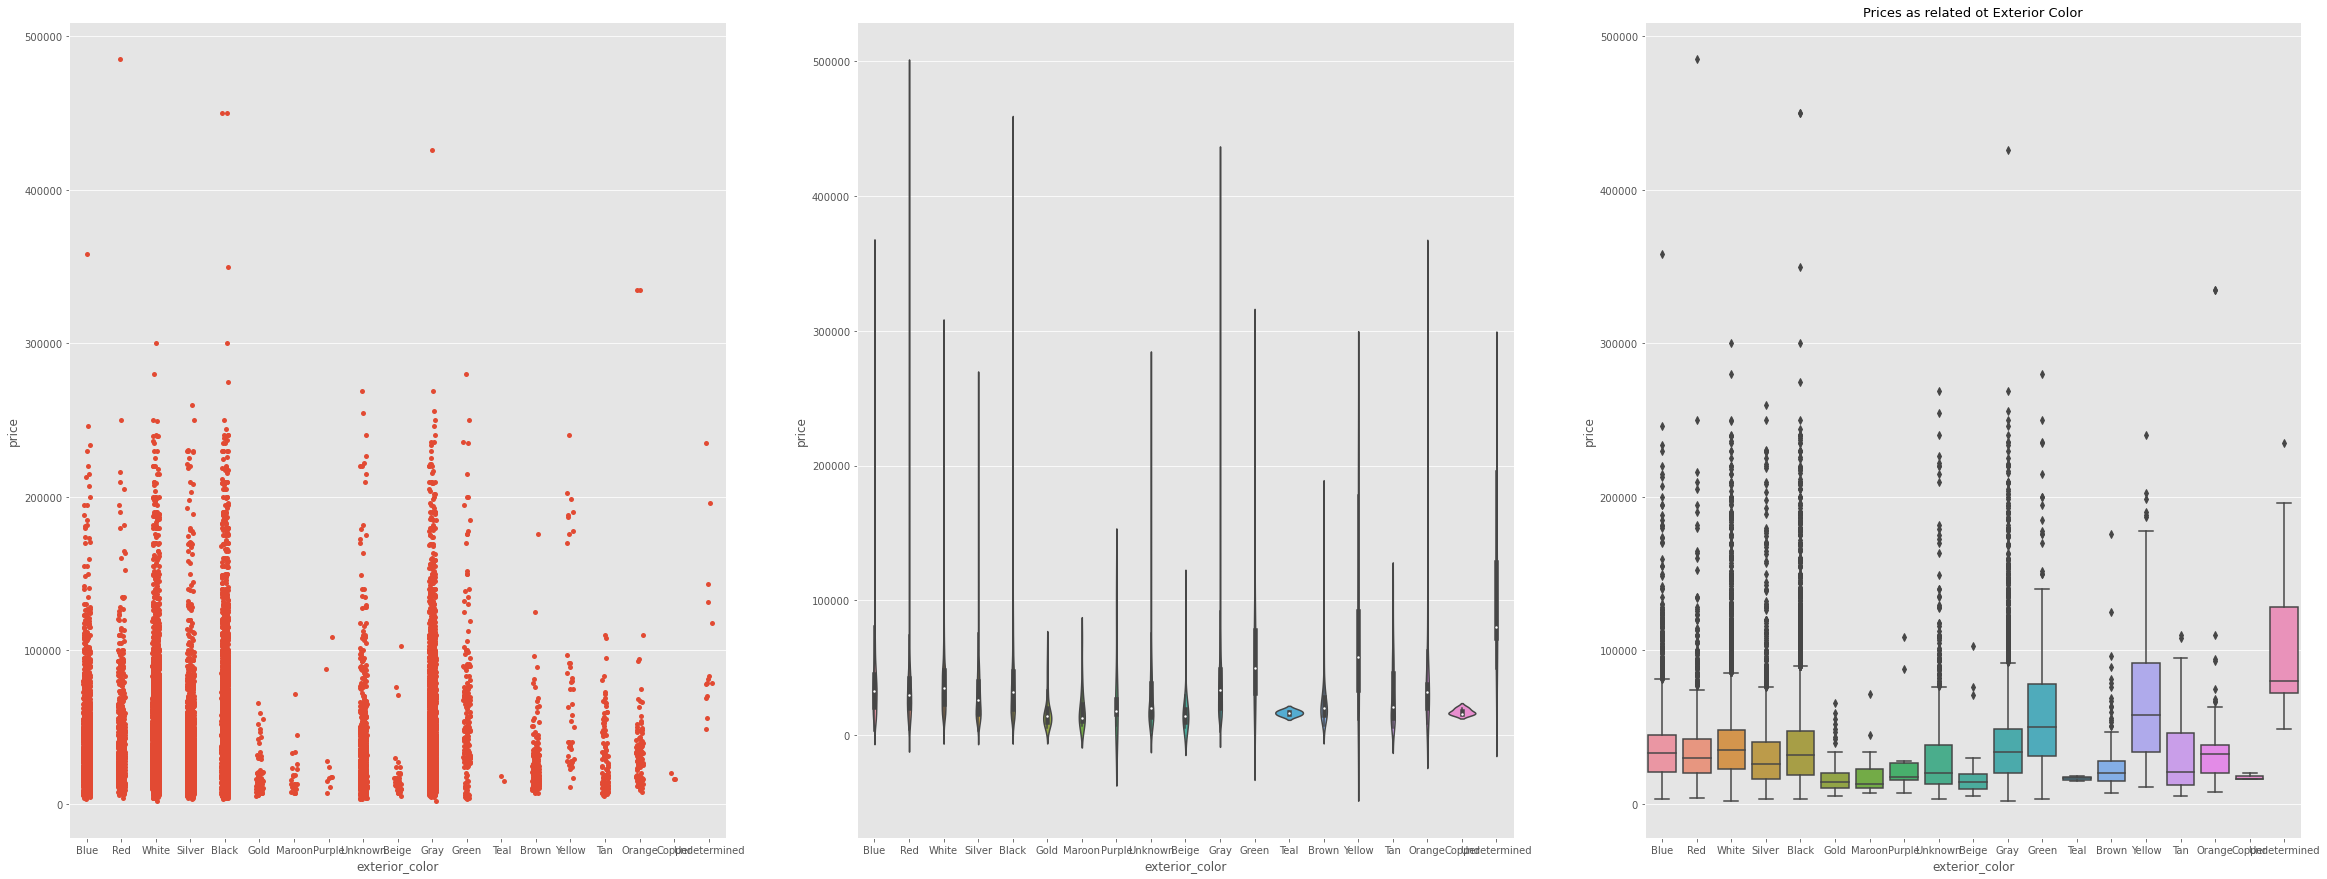

In [15]:
figure, ax = plt.subplots(1,3, figsize = (40,15))
sns.stripplot(data=df, x = 'exterior_color', y='price', ax = ax[0])
sns.violinplot(data=df, x = 'exterior_color', y='price', ax = ax[1])
sns.boxplot(data=df, x = 'exterior_color', y='price', ax = ax[2])
plt.title('Prices as related ot Exterior Color', fontsize = 13)
plt.show()

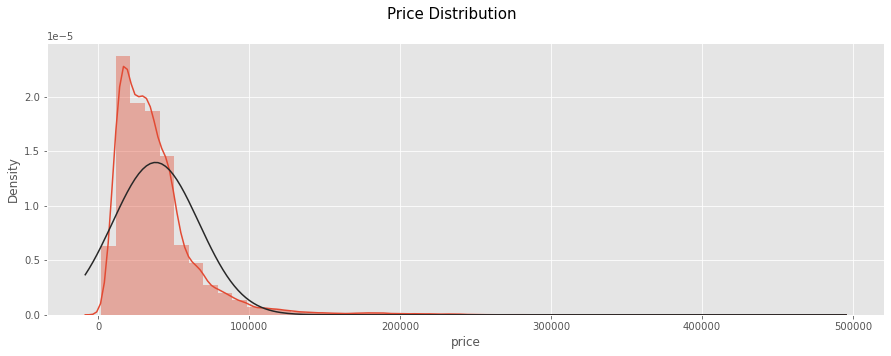

In [16]:
from scipy.stats import norm

fig= plt.figure(figsize= (20,10))
fig.suptitle("Price Distribution", fontsize= 15)

# sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])




sns.distplot(TARGET, kde = True, hist=True, fit = norm)
plt.show()

In [17]:
set(df.columns) - set(df.select_dtypes(include='number').columns) 

{'exterior_color',
 'interior_color',
 'location_city',
 'location_state',
 'make',
 'model',
 'trim',
 'usage'}

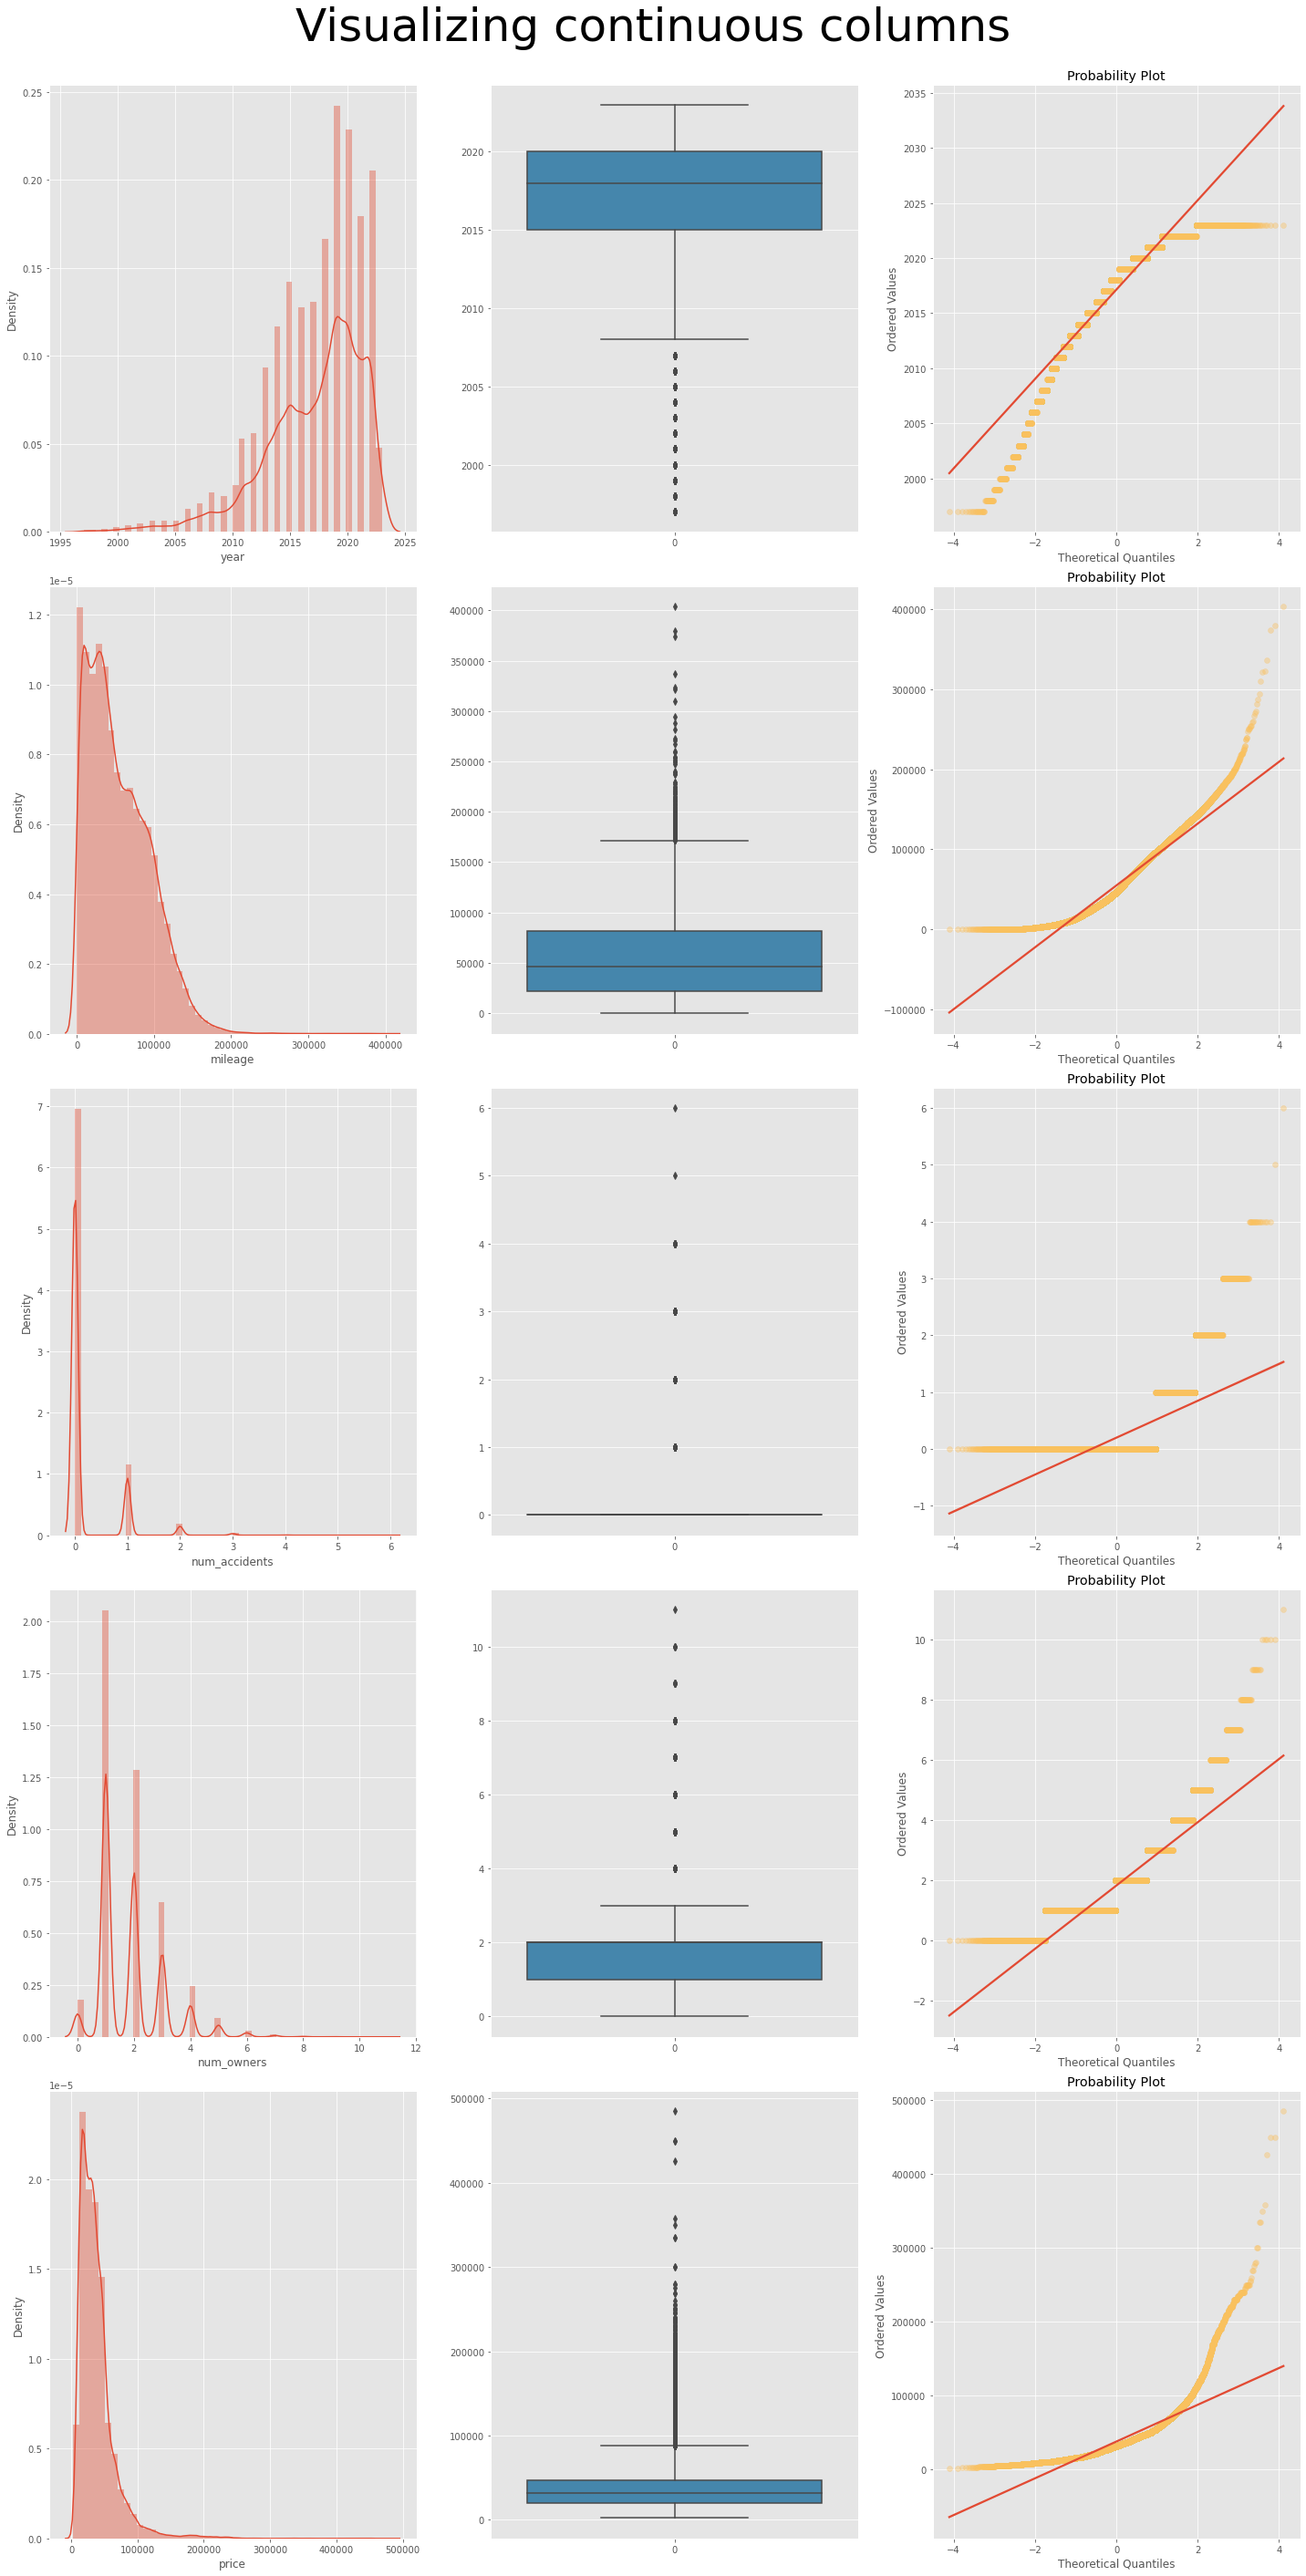

CPU times: user 8.23 s, sys: 3.47 s, total: 11.7 s
Wall time: 7.42 s


In [18]:
%%time
# Visualizaton credit Georgy Zubkov 
# Visualizaton credit Georgy Zubkov 

numeric_columns = ['year', 'mileage', 'num_accidents', 'num_owners', 'price']
fig,ax = plt.subplots(5,3,figsize=(20,40))
for index,i in enumerate(numeric_columns):
    sns.distplot(df[i],ax=ax[index,0],color=color_pal[0], kde=True)
    sns.boxplot(df[i],ax=ax[index,1],color=color_pal[1])
    probplot = stats.probplot(df[i])
    
    x, y = probplot[0]
    
    sp = sns.regplot(x=x, y=y, scatter=False, color=color_pal[0], ax=ax[index,2])
    sp.scatter(x, y, color=color_pal[4], alpha=0.4)
    sp.set_xlabel("Theoretical Quantiles")
    sp.set_ylabel("Ordered Values")
    sp.set_title('Probability Plot')

    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=50)
plt.show()

In [19]:
df.num_owners.value_counts()

1     15780
2      9893
3      4992
4      1879
0      1376
5       698
6       238
7        82
8        24
9         9
10        5
11        1
Name: num_owners, dtype: int64

In [28]:
def feature_engineering(df):
    df = df.copy()
    df['price'] = np.log(df['price'])
    df['num_accidents'] = np.sqrt(df['num_accidents'])
    
    df['mileage_binned'] = pd.cut(df['mileage'],bins=[0, 50000, 100000, np.inf], labels=['low','medium','high'])
    
    exterior_color_dummies = pd.get_dummies(df['exterior_color'], prefix='ext_color')
    interior_color_dummies = pd.get_dummies(df['interior_color'],prefix='int_color')
    df = pd.concat([df, exterior_color_dummies], axis=1)
    df = pd.concat([df, interior_color_dummies],axis=1)

    df = df.drop(['exterior_color'], axis=1)
    df = df.drop(['interior_color'], axis=1)

    

        # Multiply year and mileage to create a new feature
    df['year_mileage_product'] = df['year'] * df['mileage']

    # Divide num_accidents by num_owners to create a new feature
    df['accidents_per_owner'] = df['num_accidents'] / df['num_owners']
    
    return df

In [29]:
fe_df = feature_engineering(df)
fe_df.head()

,year,make,model,trim,mileage,location_state,location_city,num_accidents,num_owners,usage,...,int_color_Brown,int_color_Gray,int_color_Orange,int_color_Red,int_color_Silver,int_color_Unknown,int_color_White,int_color_Yellow,year_mileage_product,accidents_per_owner
0,1997,BMW,Z3,Roadster 1.9L,89677,CA,Corona,0.0,3,Personal use,...,0,0,0,0,0,1,0,0,179084969,0.0
1,1997,BMW,Z3,Roadster 1.9L,76790,IL,McCook,0.0,4,Personal use,...,0,0,0,0,0,0,0,0,153349630,0.0
2,1997,Mercedes-Benz,SL,SL 320 Roadster,134000,ND,Dickinson,0.0,3,Personal use,...,0,0,0,0,0,0,0,0,267598000,0.0
3,1997,Mercedes-Benz,SL,SL 500 Roadster,156753,IL,Chicago,0.0,9,Personal use,...,0,0,0,0,0,1,0,0,313035741,0.0
4,1997,Mercedes-Benz,SL,SL 500 Roadster,76923,AZ,Tempe,0.0,8,Personal use,...,0,0,0,0,0,1,0,0,153615231,0.0


Text(0.5, 1.0, 'Features Correlating with Used Price')

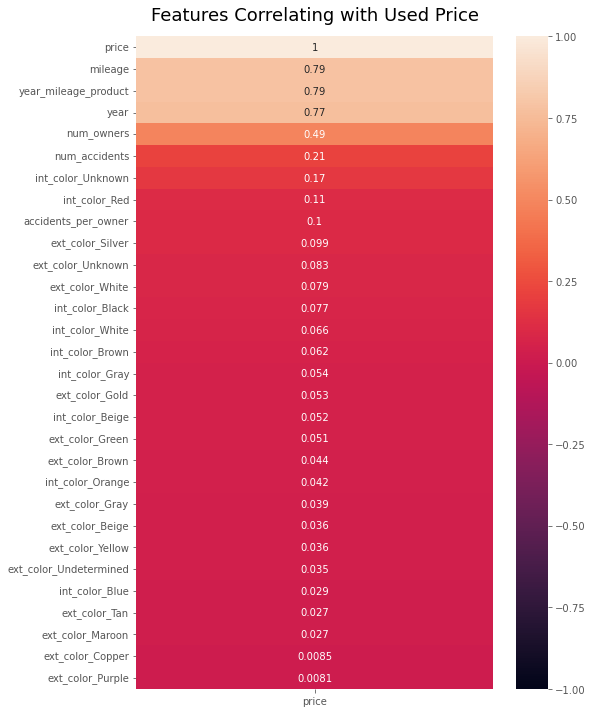

In [30]:
mat = fe_df.corr().abs()
data_corr = mat[['price']].sort_values(by='price', ascending=False)[:30]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Used Price', fontdict={'fontsize':18}, pad=16)
    

In [31]:
high_corr = np.where(mat > 0.8)
high_corr = [(mat.columns[x], mat.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
high_corr

[('mileage', 'year_mileage_product'), ('num_accidents', 'accidents_per_owner')]

In [32]:
fe_df = fe_df.drop([column[1] for column in high_corr], axis=1)

Text(0.5, 1.0, 'Features Correlating with Used Price')

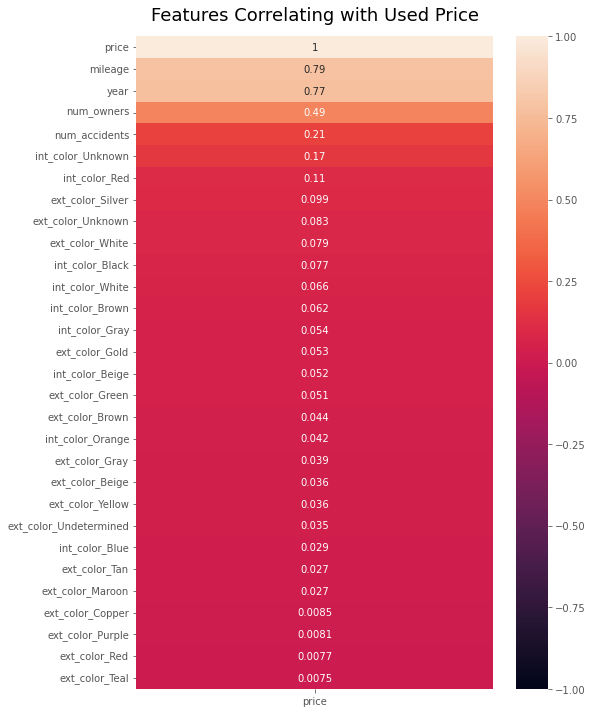

In [33]:
mat = fe_df.corr().abs()
data_corr = mat[['price']].sort_values(by='price', ascending=False)[:30]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Used Price', fontdict={'fontsize':18}, pad=16)

In [34]:
fe_df.shape

(34977, 42)

In [35]:
fe_df.dtypes

year                         int64
make                        object
model                       object
trim                        object
mileage                      int64
location_state              object
location_city               object
num_accidents              float64
num_owners                   int64
usage                       object
price                      float64
mileage_binned            category
ext_color_Beige              uint8
ext_color_Black              uint8
ext_color_Blue               uint8
ext_color_Brown              uint8
ext_color_Copper             uint8
ext_color_Gold               uint8
ext_color_Gray               uint8
ext_color_Green              uint8
ext_color_Maroon             uint8
ext_color_Orange             uint8
ext_color_Purple             uint8
ext_color_Red                uint8
ext_color_Silver             uint8
ext_color_Tan                uint8
ext_color_Teal               uint8
ext_color_Undetermined       uint8
ext_color_Unknown   

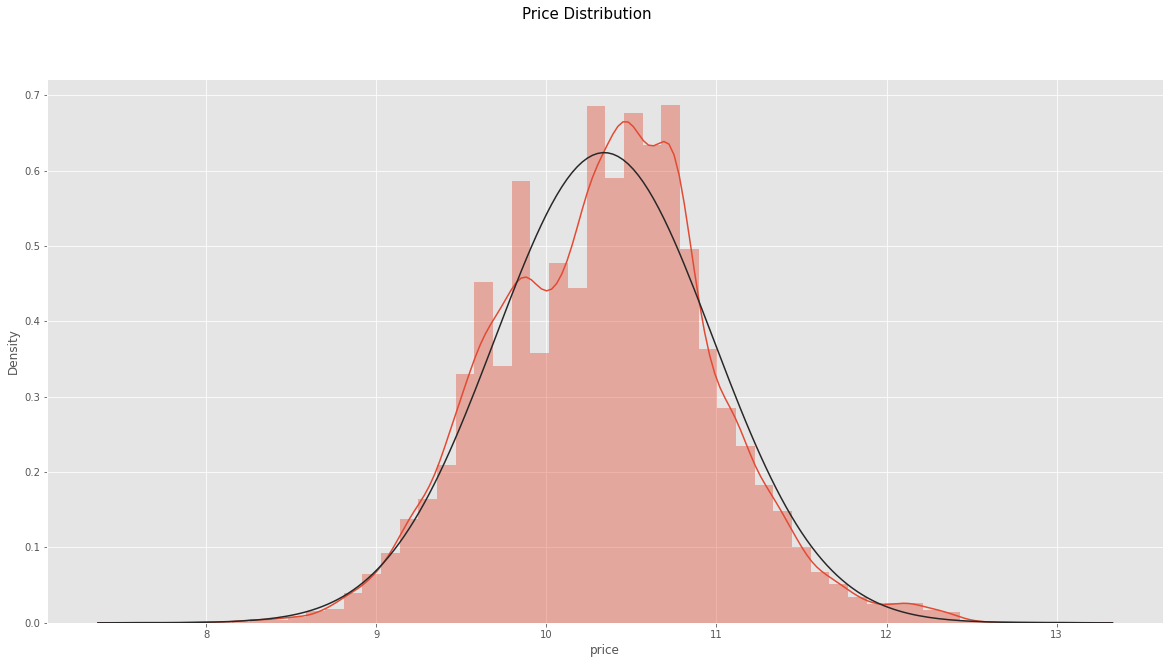

In [36]:
fig= plt.figure(figsize= (20,10))
fig.suptitle("Price Distribution", fontsize= 15)

# sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])




sns.distplot(fe_df['price'], kde = True, hist=True, fit = norm)
plt.show()

In [39]:
fe_df.to_csv('./Data/used_car_fe', index=False)